# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [2]:
import pandas as pd

df = pd.read_csv("previsao_de_renda.csv")
df.head()


,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


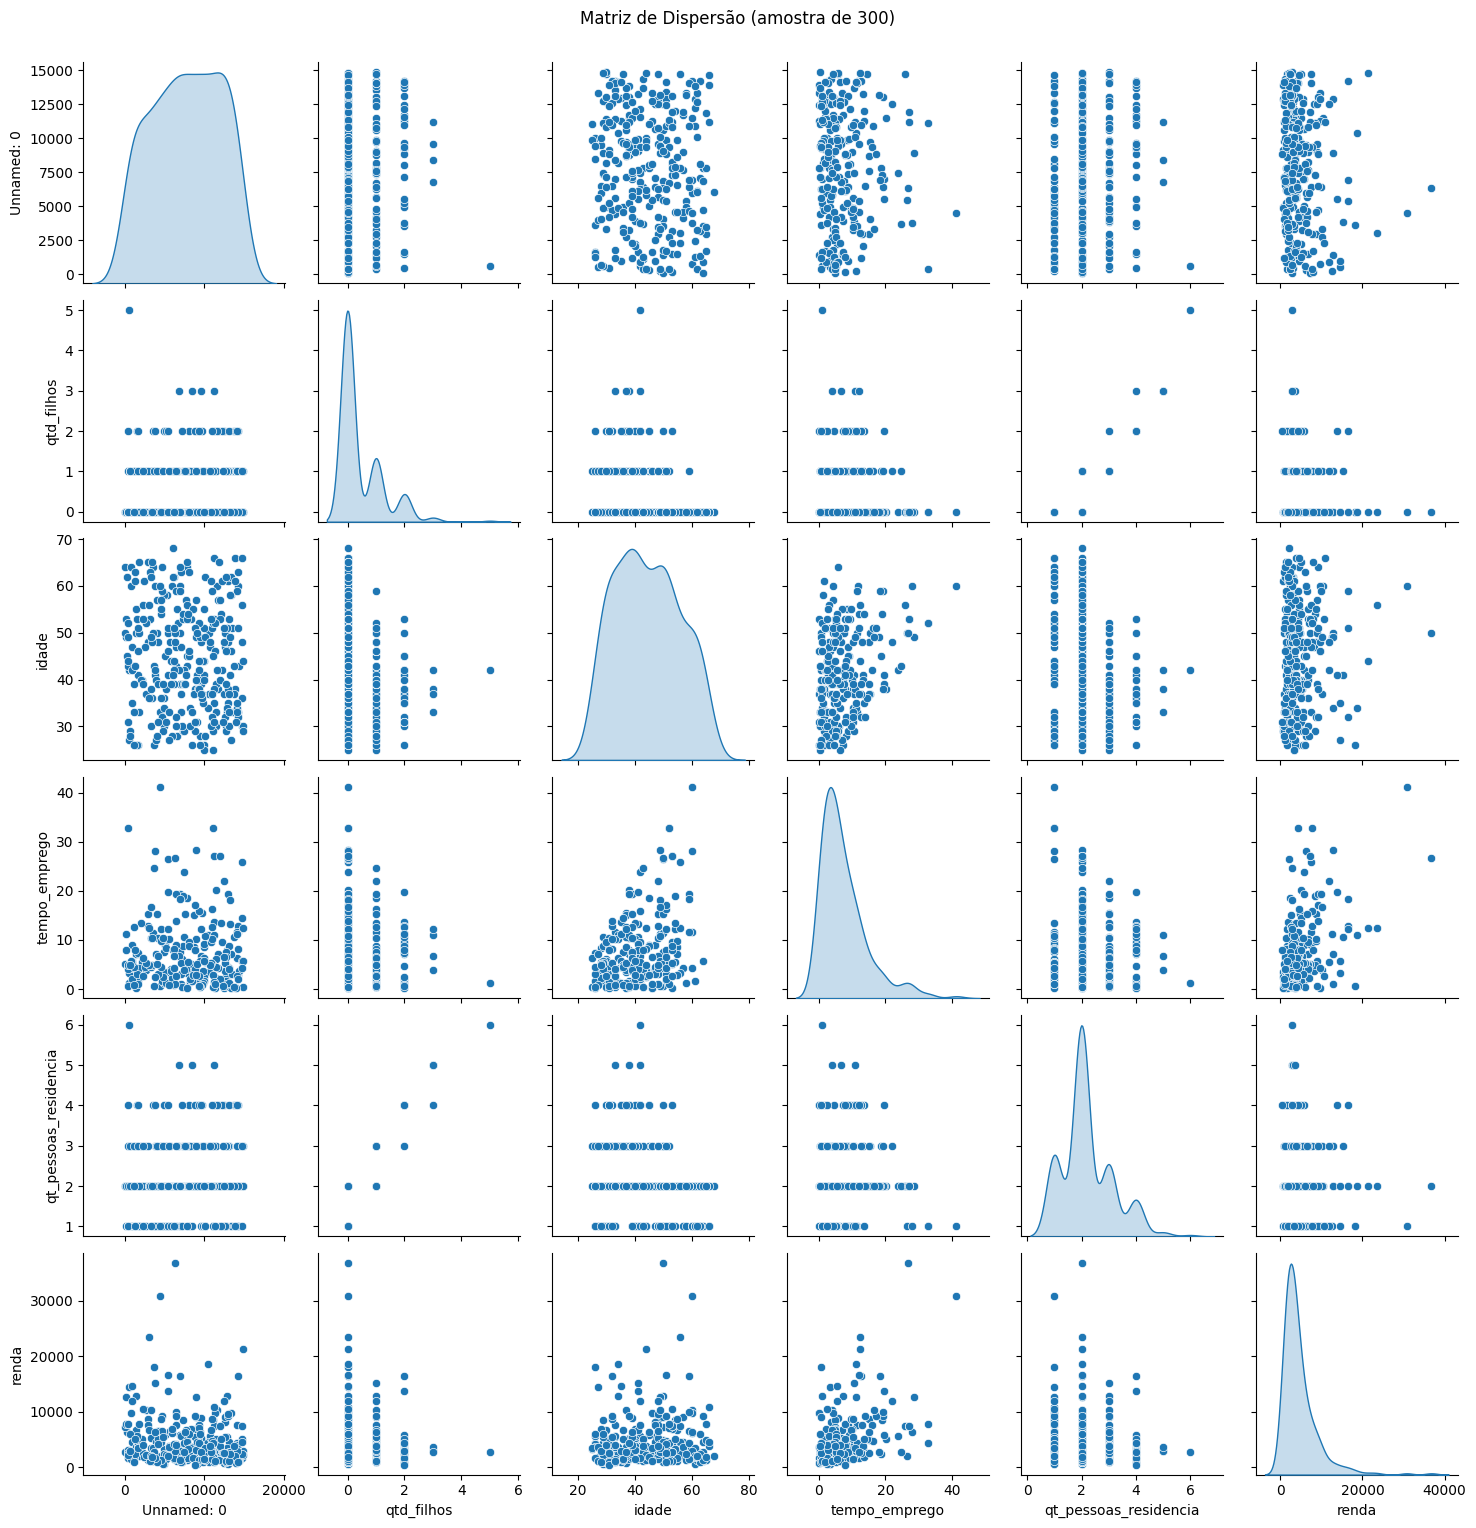

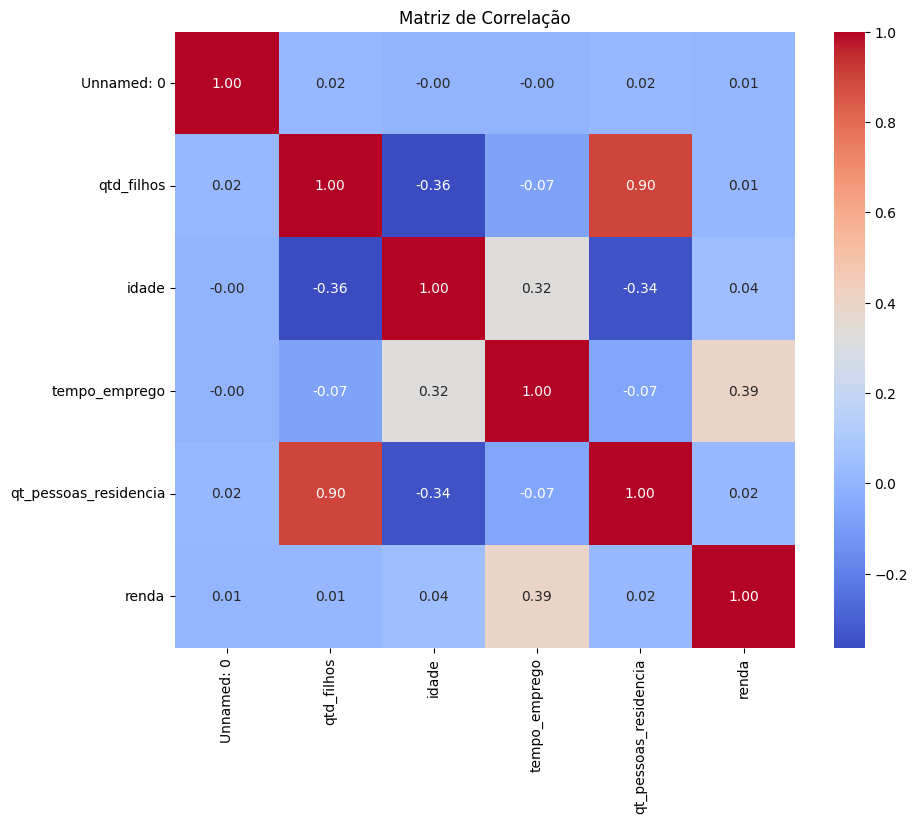

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas colunas numéricas, excluindo 'index' e ID gerado
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=['index'])

# Matriz de dispersão (pode demorar se tiver muitos dados)
sns.pairplot(numeric_df.sample(300), diag_kind='kde')
plt.suptitle("Matriz de Dispersão (amostra de 300)", y=1.02)
plt.show()

# Matriz de correlação com mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

tempo_emprego    0.394235
idade            0.042570
Name: renda, dtype: float64


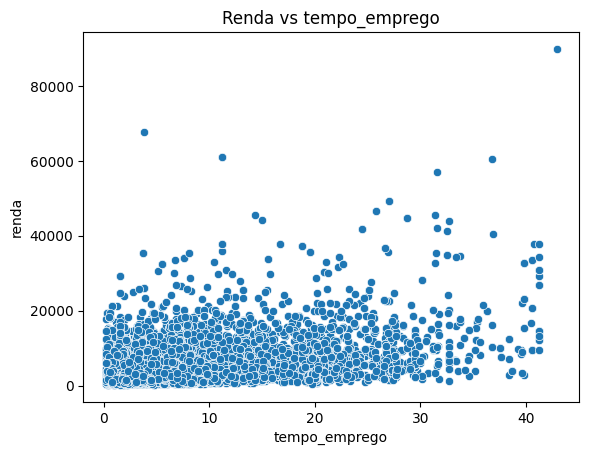

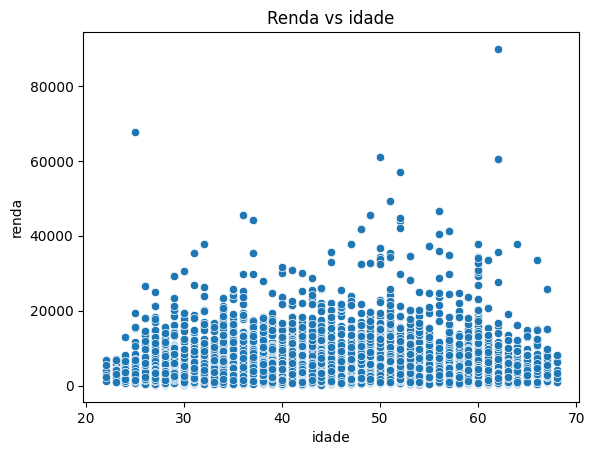

In [4]:
correlation_matrix = numeric_df.corr()
correlation_with_renda = correlation_matrix['renda'].drop('renda')
top_2 = correlation_with_renda.abs().sort_values(ascending=False).head(2)
print(top_2)

# Scatterplot dessas variáveis
for col in top_2.index:
    sns.scatterplot(data=df, x=col, y='renda')
    plt.title(f"Renda vs {col}")
    plt.show()


3) Na su aopinião, há outliers na variável renda?

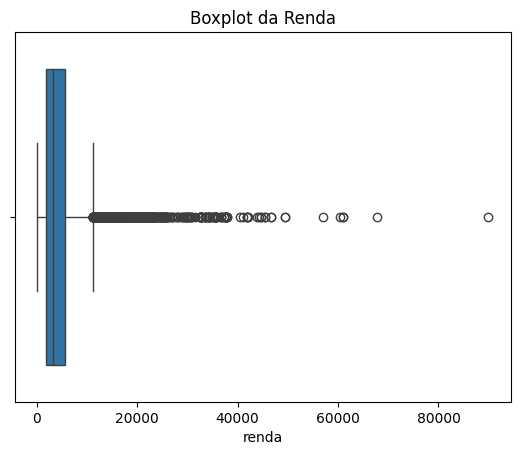

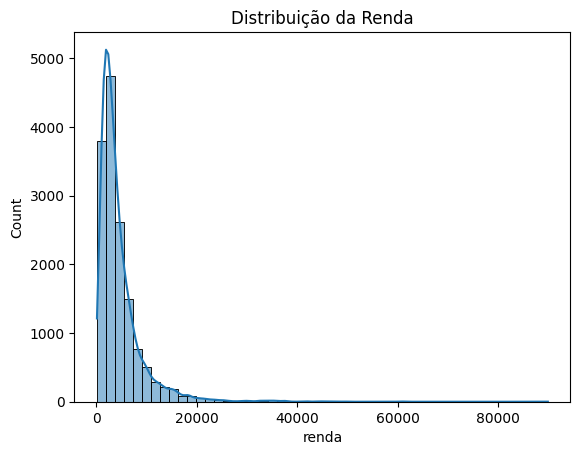

In [5]:
sns.boxplot(x=df['renda'])
plt.title("Boxplot da Renda")
plt.show()

sns.histplot(df['renda'], kde=True, bins=50)
plt.title("Distribuição da Renda")
plt.show()


4) Calcule o logaritmo da variável renda e repita a sequência de análise

Correlação com log_renda:
renda            0.835823
tempo_emprego    0.379581
Name: log_renda, dtype: float64


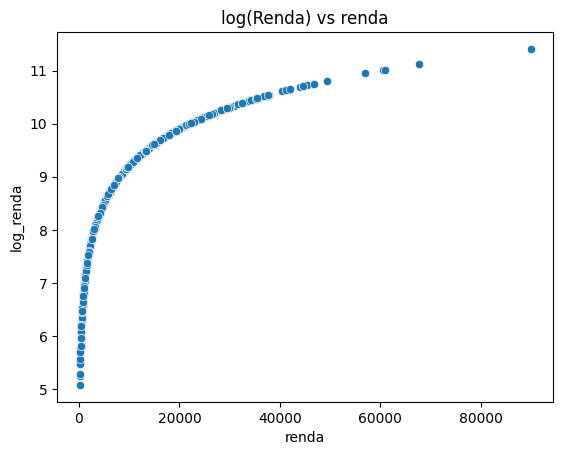

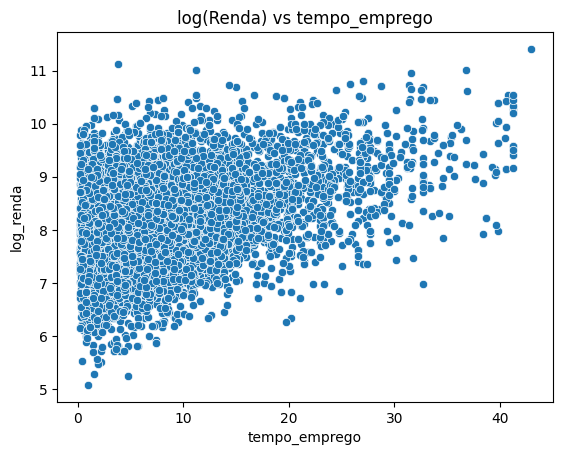

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Aplicar log da renda
df['log_renda'] = np.log1p(df['renda'])

# Manter apenas as colunas numéricas para calcular correlação
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Ver correlação com log_renda, excluindo ela mesma
log_corr = numeric_df.corr()['log_renda'].drop(['log_renda'])

print("Correlação com log_renda:")
print(log_corr.sort_values(ascending=False).head(2))

# Scatter com as variáveis mais correlacionadas com log_renda
top_log_2 = log_corr.abs().sort_values(ascending=False).head(2).index

for col in top_log_2:
    sns.scatterplot(data=df, x=col, y='log_renda')
    plt.title(f"log(Renda) vs {col}")
    plt.show()


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

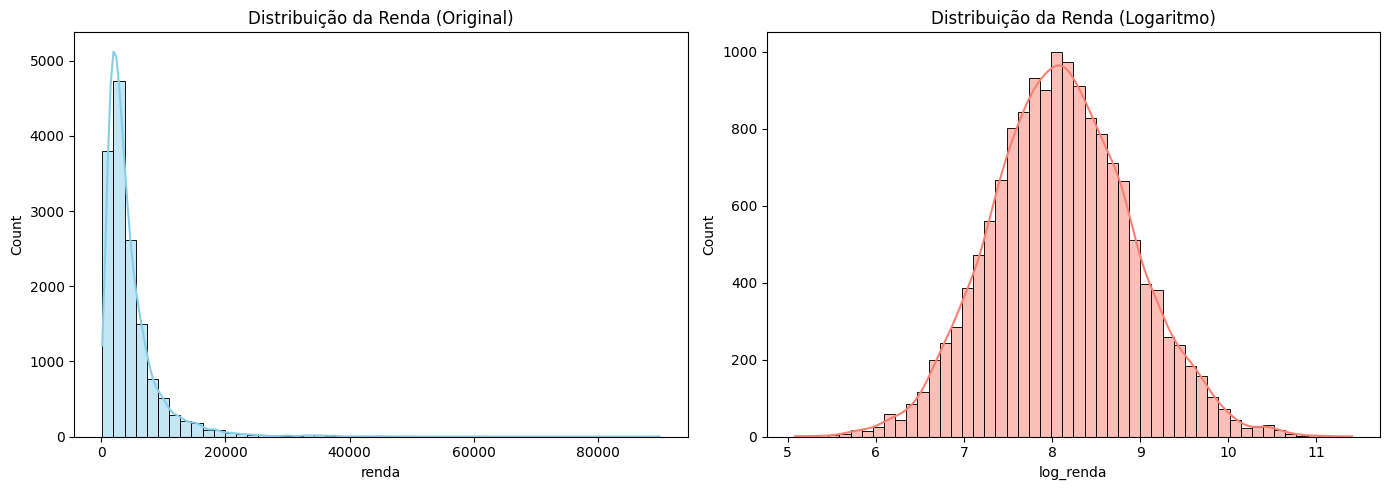


Conclusão:
A transformação logarítmica suavizou os outliers e aproximou a distribuição da renda de uma distribuição normal.
Isso facilita análises estatísticas e modelagem preditiva, tornando a análise mais robusta.



In [9]:
# Comparando as distribuições original vs. logaritmizada
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Aplicar log (se ainda não aplicado)
df['log_renda'] = np.log1p(df['renda'])

# Gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Renda original
sns.histplot(df['renda'], kde=True, bins=50, ax=axes[0], color='skyblue')
axes[0].set_title("Distribuição da Renda (Original)")

# Log da renda
sns.histplot(df['log_renda'], kde=True, bins=50, ax=axes[1], color='salmon')
axes[1].set_title("Distribuição da Renda (Logaritmo)")

plt.tight_layout()
plt.show()

# Conclusão visual em texto
print("""
Conclusão:
A transformação logarítmica suavizou os outliers e aproximou a distribuição da renda de uma distribuição normal.
Isso facilita análises estatísticas e modelagem preditiva, tornando a análise mais robusta.
""")
